In [9]:
import matplotlib.pyplot as plt
from impedance.visualization import plot_nyquist
import pandas as pd
import numpy as np

In [10]:
# Import your data.csv 
file_path = r'C:\Users\20224751\Downloads/S2_test.csv'

df = pd.read_csv(file_path)

print(df.to_string()) 

        freq/Hz  Re(Z)/Ohm  Im(Z)/Ohm
0   200000.0000      0.228  -2.440000
1   135000.0000      0.216  -1.660000
2    91700.0000      0.213  -1.120000
3    62100.0000      0.215  -0.755000
4    42100.0000      0.216  -0.509000
5    28500.0000      0.217  -0.344000
6    19300.0000      0.218  -0.232000
7    13100.0000      0.218  -0.154000
8     8850.0000      0.219  -0.104000
9     5990.0000      0.219  -0.069900
10    4060.0000      0.219  -0.047000
11    2750.0000      0.220  -0.031200
12    1860.0000      0.220  -0.020400
13    1260.0000      0.220  -0.013000
14     853.0000      0.220  -0.007430
15     578.0000      0.221  -0.003980
16     391.0000      0.221  -0.001230
17     265.0000      0.222   0.001050
18     179.0000      0.223   0.002880
19     122.0000      0.224   0.004280
20      82.3000      0.225   0.005740
21      55.7000      0.227   0.006950
22      37.7000      0.229   0.008070
23      25.6000      0.231   0.008690
24      17.3000      0.234   0.009280
25      11.7

In [11]:
# Remove white spaces from each column name
df.columns = [col.strip() for col in df.columns]
print(df.columns)

Index(['freq/Hz', 'Re(Z)/Ohm', 'Im(Z)/Ohm'], dtype='object')


In [12]:
df.columns

Index(['freq/Hz', 'Re(Z)/Ohm', 'Im(Z)/Ohm'], dtype='object')

In [16]:
data = df.loc[(df['Im(Z)/Ohm'])>-0.013000]

In [17]:
z=data['Re(Z)/Ohm'].values-1j*data['Im(Z)/Ohm'].values
print(z.shape)

(26,)


In [18]:
f_data = df.loc[(df['freq/Hz'])<1260.0000] #<13000
a_f= np.array(f_data['freq/Hz'])
print(a_f.shape)

(26,)


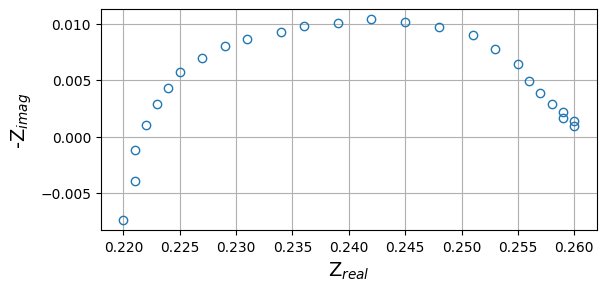

In [19]:
fig, ax = plt.subplots()
ax.plot(z.real, -z.imag, marker='o',mfc='none',ls='none')
ax.set_xlabel(r'Z$_{real}$', size=14)
ax.set_ylabel(r'-Z$_{imag}$',size=14)
ax.set_aspect('equal')
plt.grid()

TLMQ (Transmission Line Model with Constant Phase Element):

Represents a transmission line model with a CPE.
It has several parameters including R, L, Q, alpha, n, tau0, A, Lq, Ld, Cq, Cd, Rq, Rd.

import math
pi=math.pi
w = 2*pi*a_f
print(w)

In [28]:
#def Z_CPE(w, Q0, n):
    #return (1 / (Q0 * (w ** n))) * np.exp(-1j * (pi / 2) * n)

#CPE=Z_CPE(w, 1e-5, 0.1)
#CPE2 = Z_CPE(w, 1e-2, 0.1)

#print(CPE)
#print(CPE2)

In [20]:
# Circuit for the fit
from impedance.models.circuits import CustomCircuit

circuit = 'R0-p(R1,CPE1)-p(Wo1,CPE2)'
initial_guess = [1e-9, .05, 1e-5, 0.1, .5, .5, 1e-2, 0.8]

circuit = CustomCircuit(circuit, initial_guess=initial_guess)

### Fitting

Freq is used in the model together with Z (impedance- uses ReZ and ImZ)

In [21]:
print(z.shape)
print(a_f.shape)

(26,)
(26,)


In [22]:
# Fit results
circuit.fit(a_f, z)
print(circuit)


Circuit string: R0-p(R1,CPE1)-p(Wo1,CPE2)
Fit: True

Initial guesses:
     R0 = 1.00e-09 [Ohm]
     R1 = 5.00e-02 [Ohm]
  CPE1_0 = 1.00e-05 [Ohm^-1 sec^a]
  CPE1_1 = 1.00e-01 []
  Wo1_0 = 5.00e-01 [Ohm]
  Wo1_1 = 5.00e-01 [sec]
  CPE2_0 = 1.00e-02 [Ohm^-1 sec^a]
  CPE2_1 = 8.00e-01 []

Fit parameters:
     R0 = 2.21e-01  (+/- 9.23e-04) [Ohm]
     R1 = 3.95e-02  (+/- 2.19e-03) [Ohm]
  CPE1_0 = 2.18e+00  (+/- 3.27e-01) [Ohm^-1 sec^a]
  CPE1_1 = 6.62e-01  (+/- 4.17e-02) []
  Wo1_0 = 1.35e-13  (+/- 5.35e-03) [Ohm]
  Wo1_1 = 2.42e+01  (+/- 0.00e+00) [sec]
  CPE2_0 = 7.54e+00  (+/- 0.00e+00) [Ohm^-1 sec^a]
  CPE2_1 = 1.59e-01  (+/- 0.00e+00) []



In [23]:
Z_fit = circuit.predict(a_f)
print(Z_fit)

[0.22170141-0.00128942j 0.22195057-0.00164816j 0.22227994-0.002101j
 0.22271221-0.00266195j 0.22328824-0.00335737j 0.22402985-0.00417665j
 0.22503057-0.00516699j 0.22632735-0.00628602j 0.22799531-0.0075006j
 0.23007288-0.00872226j 0.23262989-0.00985702j 0.23559966-0.0107391j
 0.23884016-0.0112264j  0.24222206-0.01123851j 0.2454822 -0.01077089j
 0.24847386-0.00990199j 0.25102319-0.00878895j 0.25314269-0.0075582j
 0.25482363-0.00634538j 0.25613422-0.00522331j 0.2571438 -0.00423108j
 0.25790655-0.00339296j 0.25848819-0.0026935j  0.25892759-0.00212511j
 0.25926066-0.00166833j 0.25951333-0.00130529j]


In [24]:
Zreal_fit=Z_fit.real
Zimm_fit=-Z_fit.imag
print(Zreal_fit)
print(Zimm_fit)

[0.22170141 0.22195057 0.22227994 0.22271221 0.22328824 0.22402985
 0.22503057 0.22632735 0.22799531 0.23007288 0.23262989 0.23559966
 0.23884016 0.24222206 0.2454822  0.24847386 0.25102319 0.25314269
 0.25482363 0.25613422 0.2571438  0.25790655 0.25848819 0.25892759
 0.25926066 0.25951333]
[0.00128942 0.00164816 0.002101   0.00266195 0.00335737 0.00417665
 0.00516699 0.00628602 0.0075006  0.00872226 0.00985702 0.0107391
 0.0112264  0.01123851 0.01077089 0.00990199 0.00878895 0.0075582
 0.00634538 0.00522331 0.00423108 0.00339296 0.0026935  0.00212511
 0.00166833 0.00130529]


In [25]:
zreal=z.real
zimag=-z.imag
print(zreal)
print(zimag)

[0.22  0.221 0.221 0.222 0.223 0.224 0.225 0.227 0.229 0.231 0.234 0.236
 0.239 0.242 0.245 0.248 0.251 0.253 0.255 0.256 0.257 0.258 0.259 0.259
 0.26  0.26 ]
[-0.00743  -0.00398  -0.00123   0.00105   0.00288   0.00428   0.00574
  0.00695   0.00807   0.00869   0.00928   0.00978   0.0101    0.0104
  0.0102    0.0097    0.00905   0.0078    0.0064    0.00497   0.00386
  0.00289   0.00218   0.00169   0.00138   0.000929]


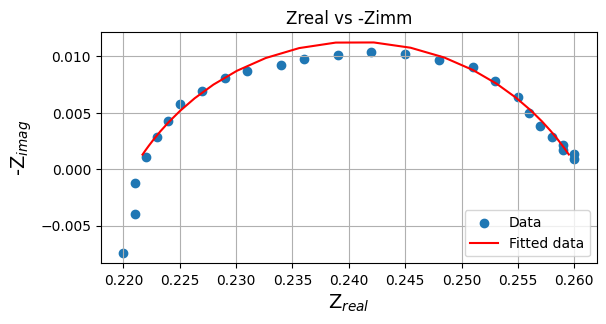

In [26]:
fig, ax = plt.subplots()
plt.scatter(zreal, zimag, label='Data')
plt.plot(Zreal_fit, Zimm_fit, label='Fitted data', color='red')
ax.set_xlabel(r'Z$_{real}$', size=14)
ax.set_ylabel(r'-Z$_{imag}$',size=14)
plt.title('Zreal vs -Zimm')
ax.set_aspect('equal')
plt.legend()
plt.grid()
plt.show()

In [27]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(zimag, Zimm_fit)
print("Mean Squared Error:", mse)

Mean Squared Error: 4.907117141333494e-06
